In [1]:
%matplotlib inline
import numpy as np
import FileIO as fio
from matplotlib import pyplot as plt
plt.style.use("ggplot")

In [2]:
rt_path = "/home/liyanc/Desktop/raid/scratch2/pose/processing/staging"
bvh_dir = "resolve_bvh2mat"

In [3]:
bvh_io = fio.BVHDirIO("{:}/{:}".format(rt_path, bvh_dir))

In [4]:
cur_list = []
for subj in bvh_io.subj_take_table:
    for take, record in bvh_io.subj_take_table[subj].items():
        if not record["is_discarded"]:
            cur_list.append(bvh_io.load_joint_curve(subj, take))

In [5]:
dis_list = []
for cur in cur_list:
    dis_per_joint = np.sqrt(np.sum((cur[:-1, :, :] - cur[1:, :, :]) ** 2, axis=2))
    mask = ~np.any(np.isnan(dis_per_joint), axis=1)
    dis_list.append(np.percentile(dis_per_joint[mask], 75, axis=1))

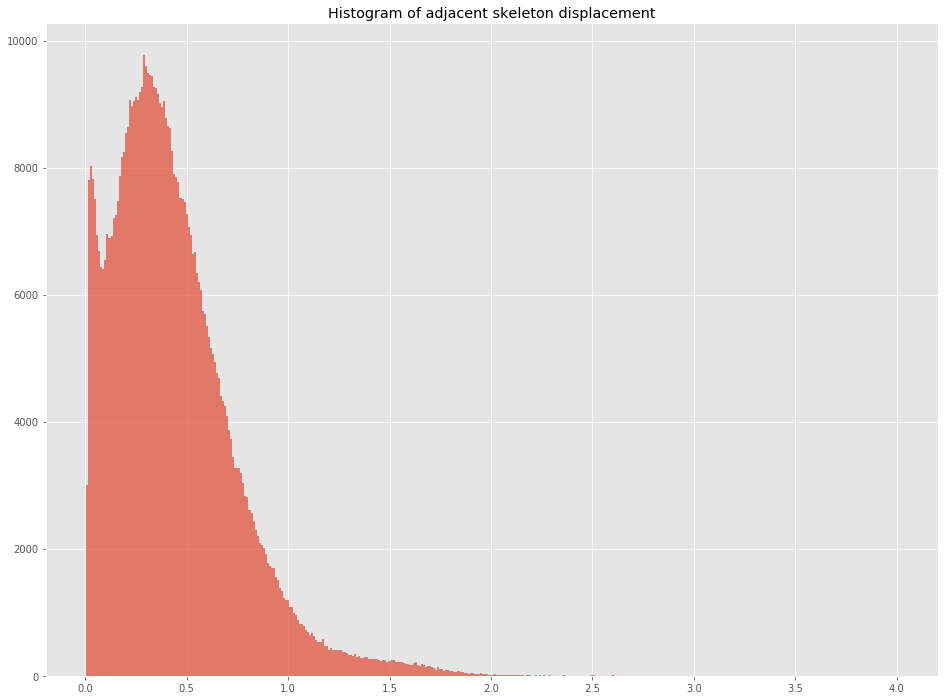

In [9]:
fig = plt.figure(figsize=(16, 12))
_ = plt.hist(np.concatenate(dis_list), bins=400, alpha=0.7)
_ = plt.title("Histogram of adjacent skeleton displacement")

In [7]:
keep_percentage = 45
print("The Threshold for keeping {:}% frames are {:}".format(keep_percentage, np.percentile(np.concatenate(dis_list), 100 - keep_percentage)))

The Threshold for keeping 45% frames are 0.4171513552080493
